In [3]:
from DMRG.Ising import Hamilton_TL
from DMRG.spin import sigma
import analyse as al

In [4]:
def ratio(energy, bound=5, lb=0):
    s = np.diff(energy)
    w = np.array([s[:-1], s[1:]])
    if bound<=1:
        a = np.min(w, axis=0)/np.max(w, axis=0)
        return a[~np.isnan(a)]
    else:
        return np.array([i for i in w[1]/w[0] if lb <= i <= bound])

0.39572570370921195

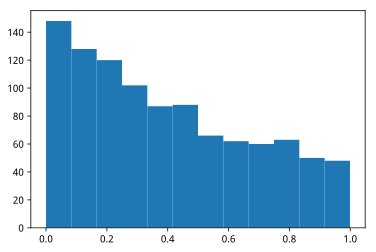

In [5]:
H = Hamilton_TL(**al.generate_args({"n":10, "J": 1, "h":0.809, "g": (0.945, 0.)}))['H']
w, v = eigh(H)

r = sorted(ratio(w, 1))
plt.hist(r, bins=12);
mean(r)

[0.95196766 1.0119204  1.00516925 0.97526597 1.03015271 0.9275716
 0.94315789 1.03631158 0.92891326 0.92414915]


0.5179269343913605

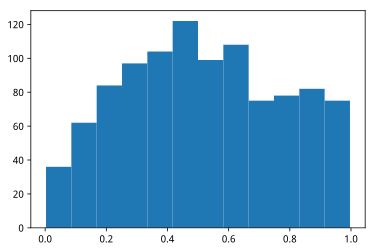

In [60]:
H = Hamilton_TL(**al.generate_args({"n":10, "J": -1, "h":0.809, "g": (0.945, 0.1)}))['H']
w, v = eigh(H)

r = sorted(ratio(w, 1))
plt.hist(r, bins=12);
mean(r)

In [63]:
w[:50]

array([-18.94451049, -15.260941  , -15.25043146, -14.18022939,
       -14.15262251, -14.00998745, -13.83079682, -13.60208474,
       -13.36718818, -13.18591134, -13.04948553, -12.34910678,
       -12.26762969, -11.86686925, -11.840871  , -11.56686412,
       -11.43231114, -11.38115663, -11.26852123, -11.2023278 ,
       -11.0616133 , -10.57609009, -10.56577432, -10.47657909,
       -10.46435391, -10.35220066, -10.3483637 , -10.2749257 ,
       -10.24375392, -10.02487568,  -9.99304241,  -9.80395509,
        -9.78639076,  -9.74599225,  -9.70813861,  -9.66697844,
        -9.64425593,  -9.48347587,  -9.4716938 ,  -9.37051852,
        -9.35838006,  -9.35113764,  -9.11540774,  -9.04417488,
        -8.91705967,  -8.84861843,  -8.83184504,  -8.78022951,
        -8.70513613,  -8.6854413 ])

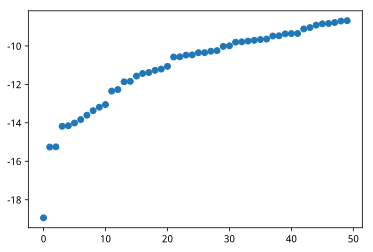

In [64]:
plot(w[:50], 'o')

[0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945 0.945]


0.4125540076701625

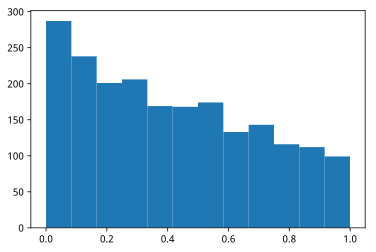

In [52]:
H = Hamilton_TL(**al.generate_args({"n":11, "J": 1, "h":0.809, "g": (0.945, 0.)}))['H']
w, v = eigh(H)

r = sorted(ratio(w, 1))
plt.hist(r, bins=12);
mean(r)

In [44]:
w

array([-9.   , -9.   , -8.618, ..., 13.472, 13.472, 17.09 ])

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


0.4498732579911405

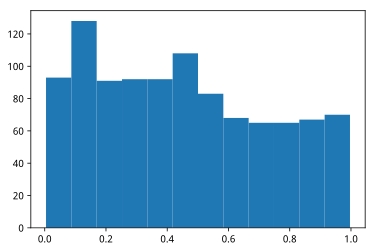

In [50]:
H = Hamilton_TL(**al.generate_args({"n":10, "J": 1, "h":0.809, "g": (4, 0)}))['H']
w, v = eigh(H)
r = sorted(ratio(w, 1))
plt.hist(r, bins=12);
mean(r)

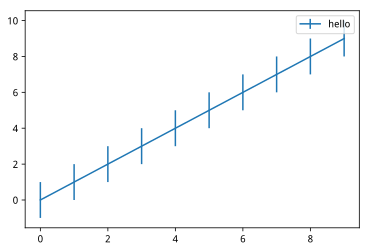

In [5]:
errorbar(arange(10), arange(10), ones(10), label='hello')
legend()

In [1]:
delta = [0.1, 0.2, 0.5, 1, 2]

In [11]:
v=[mean(D[d]) for d in D.keys()]

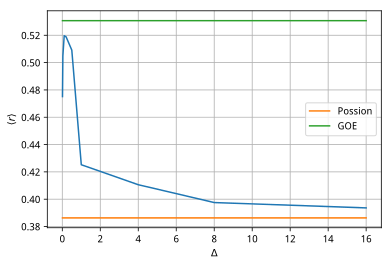

In [14]:
plot(delta, v);
plot(delta, np.full_like(delta, 0.3863), label='Possion')
plot(delta, np.full_like(delta, 0.5307), label='GOE')
grid();
legend();
xlabel(r'$\Delta$')
ylabel(r'$\langle r\rangle$');
savefig('transition.pdf')

In [55]:
def meanr(n, delta, nit=10):
    D = {}
    for d in delta:
        l = []
        if d in D:
            continue
        m = empty([nit, 2**n-2])
        for i in range(nit):
            H = Hamilton_TL(**al.generate_args({"n":n, "J": 1, "h":0.809, "g": (0.945, d)}))['H']
            w = eigvalsh(H)
            r = sorted(ratio(w, 1))
            m[i] = r
        D[d] = m
        mm = mean(m, axis=1)
        print("Mean for {}: {} +- {}".format(d, mean(mm), std(mm, ddof=1)/sqrt(len(mm))))
    return D

In [57]:
DD = []
for L in [6,7,8,9,10]:
    print(L)
    DD.append(meanr(L, [0.1, 0.2, 0.4, 0.8, 1.6, 3], 50))

6
Mean for 0.1: 0.47276641241505957 +- 0.006758393466807395
Mean for 0.2: 0.4945602355178703 +- 0.006495768730921537
Mean for 0.4: 0.5075487947063748 +- 0.005927433397278549
Mean for 0.8: 0.47877167622420785 +- 0.0075019113897972535
Mean for 1.6: 0.45750171901423764 +- 0.006857587526622734
Mean for 3: 0.44722018510466816 +- 0.0066055355935524165
7
Mean for 0.1: 0.4805398048039802 +- 0.004020717910368525
Mean for 0.2: 0.49933374031278616 +- 0.004455792859459523
Mean for 0.4: 0.5034619350130713 +- 0.004535651475746888
Mean for 0.8: 0.4621539900857314 +- 0.006965131201519983
Mean for 1.6: 0.4283920918013435 +- 0.004673951310087483
Mean for 3: 0.42847688540832984 +- 0.004544320366136296
8
Mean for 0.1: 0.5078757046869796 +- 0.0028733444280592763
Mean for 0.2: 0.5035702072728371 +- 0.0034703834787066915
Mean for 0.4: 0.5050591720465488 +- 0.003097774999237336
Mean for 0.8: 0.4523422967719029 +- 0.005013583591861207
Mean for 1.6: 0.43102297542935786 +- 0.005378426339872331
Mean for 3: 0.4299

In [39]:
l=[6,7,8,9,10,11]
m = 

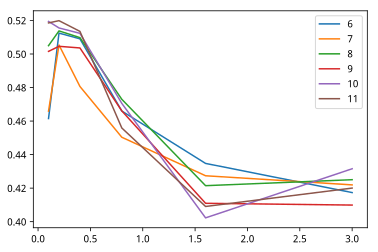

In [43]:
delta = [0.1, 0.2, 0.4, 0.8, 1.6, 3]
for i, x in zip(l, Af):
    plot(delta, x, label=str(i))
legend();